
Running ml_xgb
                           price      prob     w
date                                            
2018-08-15 02:00:00  6313.941558  0.931596  True
2018-08-15 02:05:00  6338.085089  0.944353  True
2018-08-15 02:10:00  6350.411809  0.931596  True
2018-08-15 02:15:00  6336.053894  0.876556  True
2018-08-15 02:20:00  6347.972250  0.665008  True
precision_score:0.647783251232
f1_score:0.782156133829
Compró y vendió un total de 27 y 27 veces, respectivamente

	USDT_BTC

Retorno del mercacdo: 2.13647752676
Retorno ml_xgb 10.7824571583


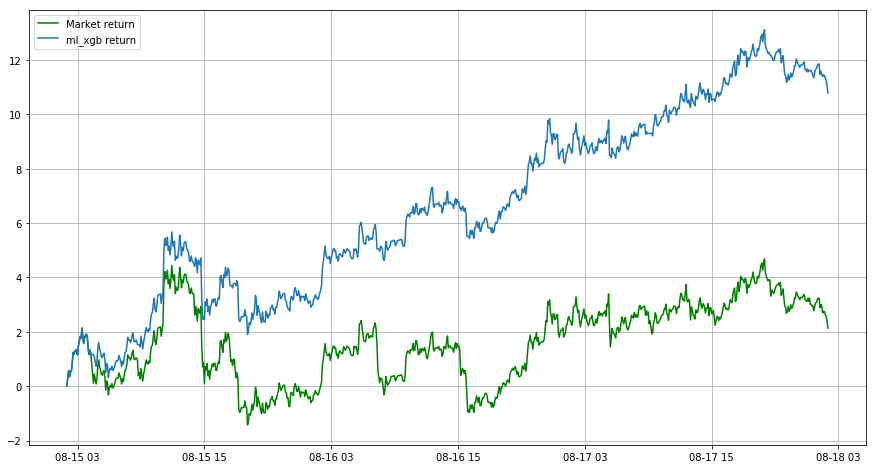

In [10]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"


start=string2ts("2018-08-15 02:00:00")
end=string2ts("2018-08-18 02:00:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.95
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
#strategies = ["ml_xgb", "ml_randfor", "ml_stacking", "ml_mlpc", "ml_logreg"]
strategies = ["ml_xgb"]
list_profit = []
list_v = []
ws = []


for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per, la=11, prob=0.1)
    relativeReturn,v = profit2(w)
    
    ws.append(w)
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='Market return')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label=strategy+' return')

plt.legend(loc='best')
plt.grid()

In [ ]:
ws[0][["w"]].head()

,w
date,
2018-08-15 02:00:00,True
2018-08-15 02:05:00,True
2018-08-15 02:10:00,True
2018-08-15 02:15:00,True
2018-08-15 02:20:00,True


In [ ]:
for la in range(3, 20):
    print "la:", la
    w, t = run_strategy("ml_mlpc", df12, pair, True, per, la=la)
    relativeReturn,v = profit(w)
    print relativeReturn*100

la: 3
                           price      prob     w
date                                            
2018-08-15 02:00:00  6313.941558  0.925287  True
2018-08-15 02:05:00  6338.085089  0.933899  True
2018-08-15 02:10:00  6350.411809  0.724542  True
2018-08-15 02:15:00  6336.053894  0.740921  True
2018-08-15 02:20:00  6347.972250  0.622302  True
precision_score:0.752173913043
f1_score:0.696878147029
64.7978845368
la: 4
                           price      prob     w
date                                            
2018-08-15 02:00:00  6313.941558  0.918553  True
2018-08-15 02:05:00  6338.085089  0.927168  True
2018-08-15 02:10:00  6350.411809  0.785494  True
2018-08-15 02:15:00  6336.053894  0.814268  True
2018-08-15 02:20:00  6347.972250  0.637198  True
precision_score:0.778494623656
f1_score:0.725450901804
59.8694912541
la: 5
                           price      prob     w
date                                            
2018-08-15 02:00:00  6313.941558  0.913078  True
2018-08-15 

In [ ]:
len(df12)